In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

movies=pd.read_csv("movies.csv", encoding="ISO-8859-1")

In [3]:
import random
import pyclustertend 
import sklearn

movies['castWomenAmount'] = pd.to_numeric(movies['castWomenAmount'], errors='coerce')
movies['castMenAmount'] = pd.to_numeric(movies['castMenAmount'], errors='coerce')
movies['castWomenAmount'] = movies['castWomenAmount'].astype(float)
movies['castMenAmount'] = movies['castMenAmount'].astype(float)
movies = movies.dropna(subset=['castWomenAmount', 'castMenAmount'])
nmovies = movies.select_dtypes(include=[float, int])
nmovies.describe()

,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
count,9838.000000,9.838000e+03,9.838000e+03,9838.000000,9838.000000,9838.000000,9838.000000,9838.000000,9838.000000,9838.000000,9838.000000,9838.000000,9838.000000
mean,244750.172088,1.883274e+07,5.762405e+07,100.939317,51.592854,6.491462,1364.069018,2.608457,3.127668,1.749034,27.678187,7.148201,16557.193434
std,254676.542333,3.681847e+07,1.506116e+08,26.803554,218.427093,0.958335,2579.594831,1.133813,2.257934,3.017306,22.700241,6.281767,100455.960117
min,5.000000,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12139.250000,0.000000e+00,0.000000e+00,90.000000,14.551750,5.900000,128.000000,2.000000,2.000000,1.000000,13.000000,3.000000,7.000000
50%,137100.000000,9.050000e+05,3.291610e+05,100.000000,21.842000,6.500000,430.000000,3.000000,3.000000,1.000000,21.000000,6.000000,12.000000
75%,446305.250000,2.100000e+07,4.619692e+07,113.000000,40.640500,7.200000,1345.750000,3.000000,4.000000,2.000000,36.000000,9.000000,20.000000
max,922260.000000,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,8.000000,26.000000,155.000000,313.000000,106.000000,922017.000000


In [7]:
# Quitando 0s porque se sabe que todos los campos son positivos mayores a 0
n_cols = nmovies.columns
nmovies = nmovies.dropna(axis=0)
nfmovies = nmovies[(nmovies > 0).all(axis=1)]

In [8]:
# Eliminación de atípicos con IQR
Q1 = nmovies.quantile(0.25)  # 25th percentile
Q3 = nmovies.quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Filter out outliers
new_movies = nfmovies[~((nfmovies < (Q1 - 1.5 * IQR)) | (nfmovies > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
# Estdaística de hopkins para medir la pertinencia de aplicar clusters
random.seed(123)
X_scale = sklearn.preprocessing.scale(new_movies[['budget','revenue', 'voteAvg','popularity','actorsAmount','voteCount','genresAmount','productionCoAmount']])
hopkins_stat = pyclustertend.hopkins(X_scale, len(X_scale))
print(f'Estadística de Hopkins: {hopkins_stat}')

Estadística de Hopkins: 0.35414489050265363


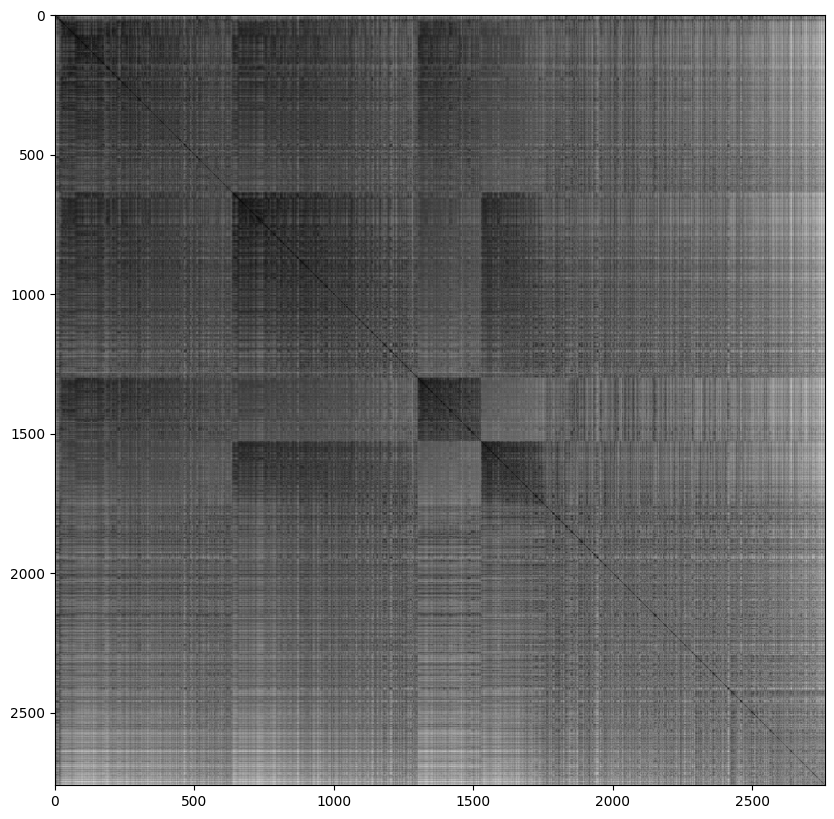

In [7]:
pyclustertend.vat(X_scale)